In [266]:
import tensorflow as tf

In [267]:
tf.__version__

'2.12.0'

In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
dataset = pd.read_csv('DataSets/Churn_Modelling.csv')

In [270]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [271]:
dataset.shape

(10000, 14)

In [272]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [273]:
dataset[dataset.dtypes[dataset.dtypes == 'object'].index]

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


# Dividing  the data into dependent and independent features

In [274]:
X = dataset.iloc[:,3:13]
y = dataset['Exited']

In [275]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [276]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [277]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


# Feature Engineering Part
1 - Conversion of categorical data into discrete data

In [278]:
dataset[dataset.dtypes[dataset.dtypes == 'object'].index]

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [279]:
dataset.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [280]:
geography =pd.get_dummies(X['Geography'], drop_first=True).astype('Int64')

In [281]:
gender = pd.get_dummies(X['Gender'], drop_first=True).astype('Int64')

In [282]:
X.drop(['Geography', 'Gender'], axis=1,inplace=True)

In [283]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [284]:
X = pd.concat([X,geography,gender],axis=True)

In [285]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# Train Test Split

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y)

In [288]:
print(X_train_full.shape)
print(X_test.shape)

(7500, 11)
(2500, 11)


In [289]:
X_train, X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [290]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5625, 11)
(1875, 11)
(5625,)
(1875,)


In [291]:
from sklearn.preprocessing import StandardScaler

In [292]:
scalar = StandardScaler()

In [293]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
X_valid = scalar.transform(X_valid)

In [294]:
X_train

array([[ 0.50252034,  0.67211847, -0.00841544, ..., -0.57892409,
         1.73885168, -1.10762848],
       [ 0.05999178, -0.18177627, -1.73603699, ..., -0.57892409,
         1.73885168, -1.10762848],
       [-0.2693318 , -0.75103943,  1.02815749, ..., -0.57892409,
         1.73885168, -1.10762848],
       ...,
       [ 0.30698446, -0.46640785,  0.68263318, ..., -0.57892409,
        -0.57509218,  0.9028298 ],
       [ 0.04970042, -0.27665346,  1.02815749, ..., -0.57892409,
        -0.57509218,  0.9028298 ],
       [ 0.92446618, -0.37153066, -1.39051268, ..., -0.57892409,
        -0.57509218, -1.10762848]])

In [295]:
X_train.shape

(5625, 11)

# Now Create ANN Model

In [296]:
import tensorflow as tf

In [308]:
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [298]:
classifier = Sequential()

In [299]:
X_train.shape[1:]

(11,)

In [300]:
classifier.add(Dense(units = 11, activation = 'relu', name = 'Input_Layer'))

In [301]:
classifier.add(Dense(units = 7, activation = 'relu', name = 'First_Hidden_Layer'))

In [302]:
classifier.add(Dense(units = 6, activation = 'relu', name = 'Second_Hidden_Layer'))

In [303]:
classifier.add(Dense(units = 1, activation = 'sigmoid', name = 'Output_Layer'))

In [304]:
classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['Accuracy'])

In [309]:
early_Stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,)

In [310]:
model_history = classifier.fit(X_train,y_train, validation_data=(X_valid,y_valid), epochs=100, batch_size=10, callbacks=early_Stopping)

Epoch 1/100
563/563 [==============================] - 5s 8ms/step - loss: 0.5382 - Accuracy: 0.7922 - val_loss: 0.5139 - val_Accuracy: 0.7936
Epoch 2/100
563/563 [==============================] - 4s 7ms/step - loss: 0.5048 - Accuracy: 0.7938 - val_loss: 0.5021 - val_Accuracy: 0.7936
Epoch 3/100
563/563 [==============================] - 4s 7ms/step - loss: 0.4932 - Accuracy: 0.7938 - val_loss: 0.4956 - val_Accuracy: 0.7936
Epoch 4/100
563/563 [==============================] - 4s 7ms/step - loss: 0.4839 - Accuracy: 0.7938 - val_loss: 0.4884 - val_Accuracy: 0.7936
Epoch 5/100
563/563 [==============================] - 4s 7ms/step - loss: 0.4737 - Accuracy: 0.7938 - val_loss: 0.4809 - val_Accuracy: 0.7936
Epoch 6/100
563/563 [==============================] - 4s 7ms/step - loss: 0.4619 - Accuracy: 0.7938 - val_loss: 0.4730 - val_Accuracy: 0.7936
Epoch 7/100
563/563 [==============================] - 4s 7ms/step - loss: 0.4505 - Accuracy: 0.7938 - val_loss: 0.4660 - val_Accuracy: 0.7936

In [311]:
model_history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

<Axes: >

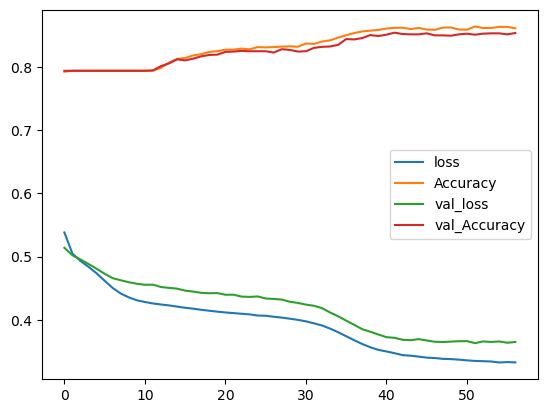

In [314]:
pd.DataFrame(model_history.history).plot()

In [333]:
classifier.evaluate(X_test,y_test)

79/79 [==============================] - 1s 5ms/step - loss: 0.3398 - Accuracy: 0.8596


[0.3397904932498932, 0.8596000075340271]

# Prediction

In [327]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

 1/79 [..............................] - ETA: 1s

79/79 [==============================] - 0s 2ms/step


# Confusion Matrix

In [322]:
from sklearn.metrics import confusion_matrix

In [332]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1899,  111],
       [ 240,  250]])

In [318]:
from sklearn.metrics import accuracy_score

In [329]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8596